In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import random
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np

In [2]:
# Veri setini yüklemek
df = pd.read_csv("Training.csv")  # Dosya yolu ve adını doğru şekilde girin

# İlk beş satırı göstermek
print(df.head())

# Veri setinin genel bilgilerini göstermek
print(df.info())

# Basit istatistikleri göstermek
print(df.describe())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

In [3]:
# Özellikler ve hedef değişkeni ayırma
X = df.iloc[:, :-1]  # son sütun hariç tüm sütunlar
y = df["prognosis"]  # son sütun

# Veriyi kontrol etme (isteğe bağlı)
print(X.head())
print(y.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [4]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ayırma işleminin sonuçlarını kontrol etme (isteğe bağlı)
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (3936, 133)
Test seti boyutu: (984, 133)


In [5]:
# LabelEncoder nesnesini oluştur
label_encoder = LabelEncoder()

# Eğitim ve test verilerindeki hastalık adlarını sayısal değerlere dönüştür
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [6]:
# 'prognosis' sütununu X_train veri setinden çıkar
X_train = X_train.drop("prognosis", axis=1)

In [7]:
# X_train veri setindeki tüm sütunların veri tiplerini kontrol etme
print(X_train.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
small_dents_in_nails    int64
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
Length: 132, dtype: object


In [8]:
# RandomForestClassifier modelini oluşturma
model = RandomForestClassifier()

# Modeli eğitme
model.fit(X_train, y_train_encoded)

# Test veri setinden 'prognosis' sütununu çıkarma
X_test = X_test.drop(columns=["prognosis"])

# Modeli tekrar test etme
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Modelin doğruluk oranı:", accuracy)

Modelin doğruluk oranı: 1.0


In [9]:
# X ve y veri setlerini bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# y_train ve y_test etiketlerini sayısal değerlere dönüştürme
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Boyutları kontrol etme
print("X_train boyutları:", X_train.shape)
print("y_train_encoded boyutları:", y_train_encoded.shape)
print("X_test boyutları:", X_test.shape)
print("y_test_encoded boyutları:", y_test_encoded.shape)

X_train boyutları: (3936, 133)
y_train_encoded boyutları: (3936,)
X_test boyutları: (984, 133)
y_test_encoded boyutları: (984,)


In [10]:
# 'prognosis' ve 'Unnamed: 133' sütunlarını çıkar
X = df.drop(["prognosis", "Unnamed: 133"], axis=1)

# 'prognosis' sütununu etiketler (y) olarak ayarla
y = df["prognosis"]
 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [13]:
# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred)

print("Modelin doğruluk oranı:", accuracy)
print("\nHata Matrisi:\n", conf_matrix)
print("\nSınıflandırma Raporu:\n", class_report)

Modelin doğruluk oranı: 1.0

Hata Matrisi:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       

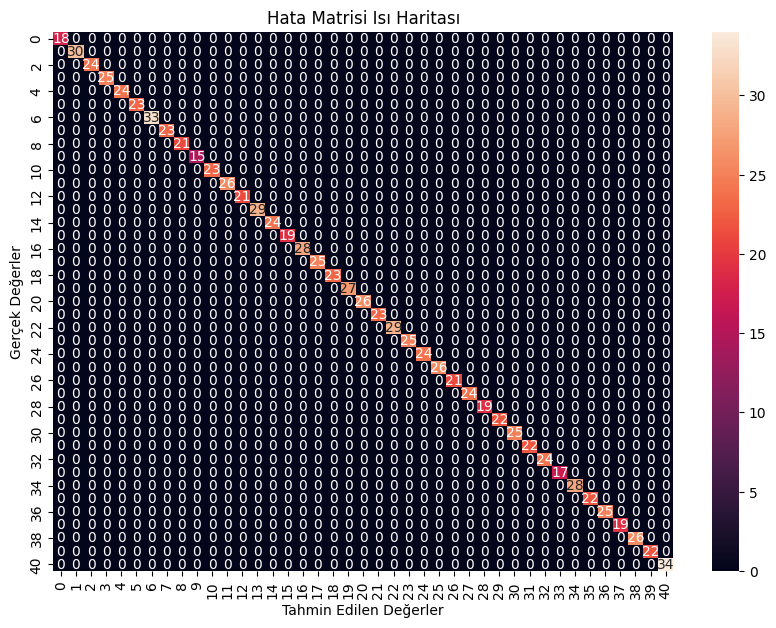

In [19]:
# Hata matrisini ısı haritası olarak çizme
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Hata Matrisi Isı Haritası")
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

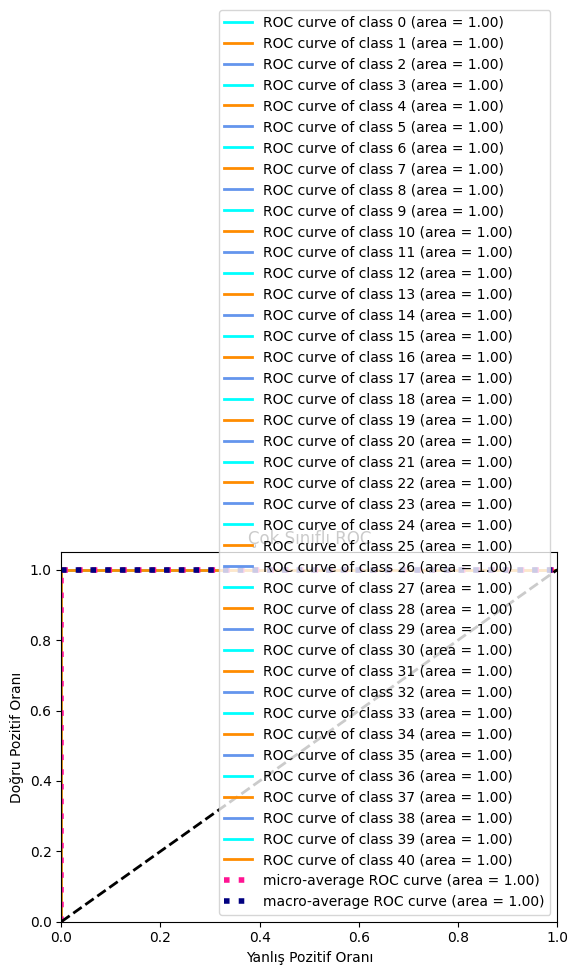

In [23]:
# Sınıfları ikili formata dönüştür
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Sınıf sayısı
n_classes = y_test_binarized.shape[1]

# Her sınıf için ROC eğrisi hesapla
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Mikro ortalama ROC eğrisi ve AUC hesaplama
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), model.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Makro ortalama ROC eğrisi ve AUC hesaplama
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ROC eğrilerini çiz
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('Çok Sınıflı ROC')
plt.legend(loc="lower right")
plt.show()

In [14]:
joblib.dump(model, "hastalik_tahmin_modeli.pkl")

['hastalik_tahmin_modeli.pkl']

In [16]:
# Belirtilerin ve hastalıkların Türkçe karşılıklarını içeren dosyaları okuma fonksiyonu
def dosya_oku(dosya_yolu):
    with open(dosya_yolu, "r", encoding="utf-8") as dosya:
        return json.load(dosya)


# Modeli yükle
model = joblib.load("hastalik_tahmin_modeli.pkl")

# Testing.csv dosyasını yükle
df = pd.read_csv("Testing.csv")

# LabelEncoder yükle
label_encoder = LabelEncoder()
label_encoder.fit(df["prognosis"])

# İngilizce belirtiler ve hastalıkların Türkçe karşılıkları içeren dosyaları oku
belirti_ceviri = dosya_oku("belirtiler_ceviri.json")
hastalik_ceviri = dosya_oku("hastaliklar_ceviri.json")


# Kullanıcıdan belirtileri almak için fonksiyon
def kullanici_girdisi_al(sorular, ceviri):
    kullanici_girdileri = {}
    for soru in sorular:
        turkce_soru = ceviri.get(soru, soru)
        cevap = input(turkce_soru + " (evet/hayır): ").lower()
        while cevap not in ["evet", "hayır"]:
            print("Lütfen sadece 'evet' veya 'hayır' olarak cevap verin.")
            cevap = input(turkce_soru + " (evet/hayır): ").lower()
        kullanici_girdileri[soru] = 1 if cevap == "evet" else 0
    return kullanici_girdileri


# Modeli kullanarak tahmin yapmak için fonksiyon
def tahmin_yap(model, label_encoder, girdiler):
    tam_girdiler = {ozellik: 0 for ozellik in df.columns[:-1]}
    tam_girdiler.update(girdiler)
    sayisal_girdiler = list(tam_girdiler.values())
    tahmin = model.predict([sayisal_girdiler])
    tahmin_edilen_hastalik = label_encoder.inverse_transform(tahmin)[0]
    # Tahmin edilen hastalığın Türkçe karşılığını döndür
    return hastalik_ceviri.get(tahmin_edilen_hastalik, tahmin_edilen_hastalik)


# Rastgele 10 belirti seçmek için soruları hazırlama
secilen_sorular = random.sample(list(df.columns[:-1]), 10)
kullanici_girdileri = kullanici_girdisi_al(secilen_sorular, belirti_ceviri)

# Tahmini yap
tahmin_edilen_hastalik = tahmin_yap(model, label_encoder, kullanici_girdileri)

# Sonucu yazdır
print("\nTahmin edilen hastalık:", tahmin_edilen_hastalik)


Tahmin edilen hastalık: Bronşiyal Astım


c:\Users\hbsamur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
